#### 이미지 처리

> 흑백 이미지로 로드

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("c:/vscode/data/images/plane.jpg", cv2.IMREAD_GRAYSCALE)

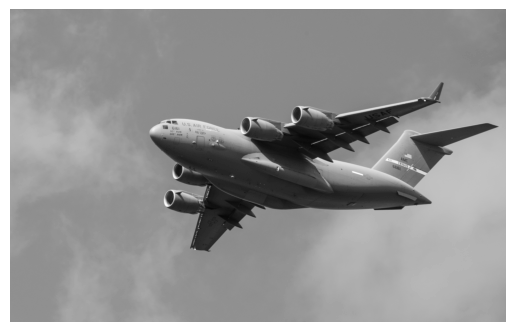

In [21]:
# 이미지를 출력
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

In [22]:
# 데이터 타입을 확인
type(image)

numpy.ndarray

In [23]:
# 이미지 데이터를 확인
image

array([[140, 136, 146, ..., 132, 139, 134],
       [144, 136, 149, ..., 142, 124, 126],
       [152, 139, 144, ..., 121, 127, 134],
       ...,
       [156, 146, 144, ..., 157, 154, 151],
       [146, 150, 147, ..., 156, 158, 157],
       [143, 138, 147, ..., 156, 157, 157]], dtype=uint8)

In [24]:
# 이미지의 해상도(차원)
image.shape

(2270, 3600)

> 컬러로 이미지를 로드

In [ ]:
image_bgr = cv2.imread("c:/vscode/data/images/plane.jpg", cv2.IMREAD_COLOR)
# 픽셀 확인
# image_bgr
# opencv에서는 bgr color를 사용하므로 matplotlib에서 출력하려면 변환해야 함

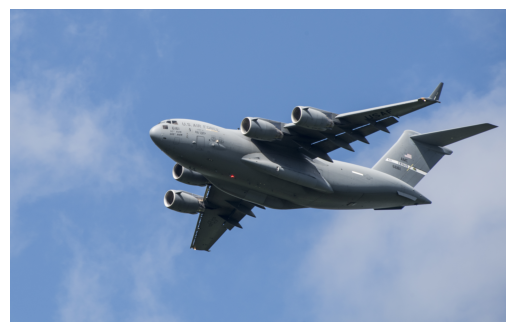

In [27]:
# BGR을 RGB로 변환
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# 이미지를 출력
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

In [28]:
# 이미지 저장
cv2.imwrite("c:/vscode/data/images/plane_new.jpg", image)

True

> 이미지 크기 변경

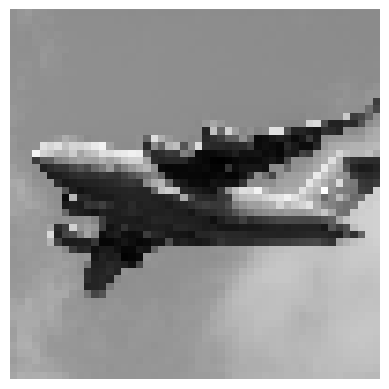

In [29]:
# 이미지 크기를 50x50 픽셀로 변환
image_50x50 = cv2.resize(image, (50, 50))
# 이미지를 출력
plt.imshow(image_50x50, cmap="gray")
plt.axis("off")
plt.show()

> 이미지 자르기

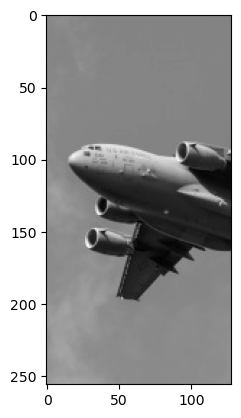

In [30]:
# 열의 처음 절반과 모든 행을 선택
image_cropped = image[:,:128]
# 이미지를 출력
plt.imshow(image_cropped, cmap="gray")
plt.show()

> 이미지 흐리게 하기

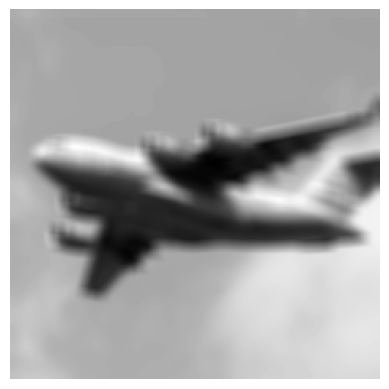

In [31]:
# 커널 사이즈 10x10, 커널 사이즈가 클수록 이미지가 더 부드러워지게 됨
image_blurry = cv2.blur(image, (10,10))
# 이미지를 출력
plt.imshow(image_blurry, cmap="gray"), plt.axis("off")
plt.show()

> 커널을 적용

In [33]:
# 커널을 만드는 방법
# 5x5 커널
kernel = np.ones((5,5)) / 25.0
# 커널의 값을 모두 더하면 1
sum(kernel.flatten())
# 커널을 확인
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

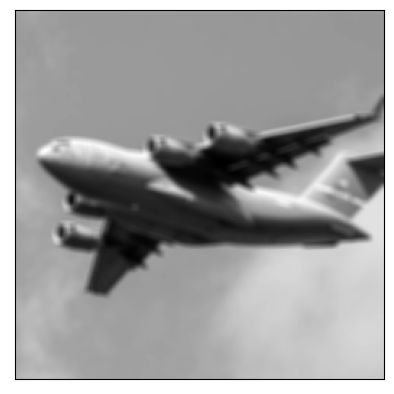

In [34]:
#src: 이미지
#ddepth: 이미지 깊이(자료형 크기). -1이면 입력과 동일
#kernel: 커널 행렬
image_kernel = cv2.filter2D(image, -1, kernel)
# 이미지를 출력
plt.imshow(image_kernel, cmap="gray"), plt.xticks([]),
plt.yticks([])
plt.show()

> 이미지를 선명하게 처리

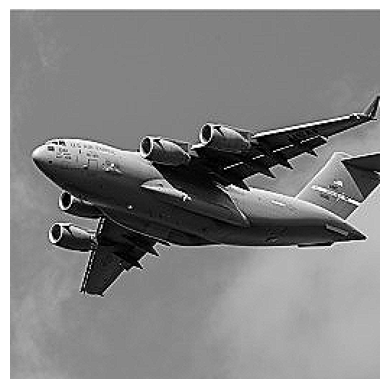

In [35]:
# 중앙 픽셀을 부각하는 커널
kernel = np.array([[0, -1, 0],
[-1, 5,-1],
[0, -1, 0]])
# 이미지를 선명하게 처리
image_sharp = cv2.filter2D(image, -1, kernel)
# 이미지를 출력
plt.imshow(image_sharp, cmap="gray"), plt.axis("off")
plt.show()
#이미지의 경계선에서 대비가 강조되게 됨

> 대비 향상

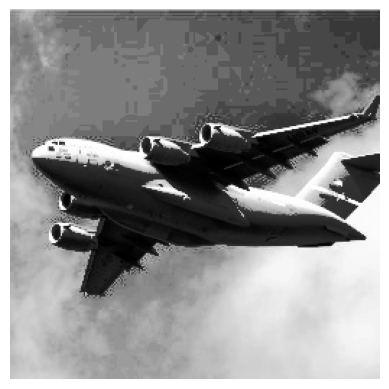

In [36]:
image_enhanced = cv2.equalizeHist(image)
# 이미지를 출력
plt.imshow(image_enhanced, cmap="gray"), plt.axis("off")
plt.show()

> 경계선 감지

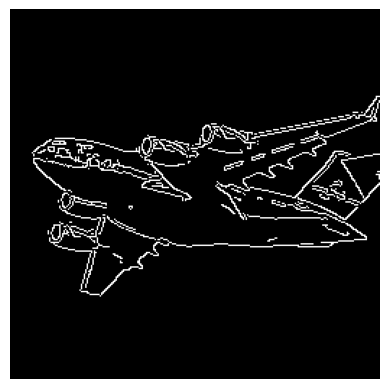

In [37]:
# 픽셀 강도의 중간값을 계산
median_intensity = np.median(image)
# 중간 픽셀 강도에서 위아래 1 표준편차 떨어진 값을 임계값으로 지정
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) *
median_intensity))
# 경계선 감지 함수를 적용
image_canny = cv2.Canny(image, lower_threshold, upper_threshold)
# 이미지를 출력
plt.imshow(image_canny, cmap="gray"), plt.axis("off")
plt.show()